线性回归属于有监督的学习,有监督：对历史数据进行分析，从而预测出后面的趋势

样本特征只有一个，称为简单线性回归

### 简单线性回归

$y=wx+b$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

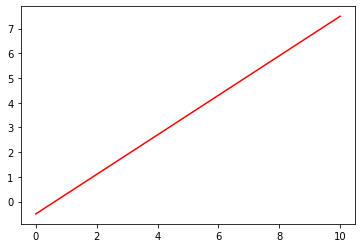

In [2]:
x = np.linspace(0, 10, 50)
y = 0.8 * x - 0.5
plt.plot(x, y, color='r')

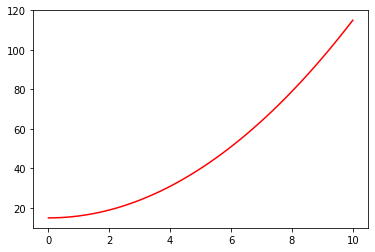

In [3]:
y = x ** 2 + 15
plt.plot(x, y, color='r')

### 多元线性回归

$\hat{y} = w_1X_1 + w_2X_2 + …… + w_nX_n + b$

向量的写法  $\hat{y} = w^Tx$

有多个特征

#### 正规方程 

In [4]:
X = np.array([[1, 1], [2, -1]])
X

array([[ 1,  1],
       [ 2, -1]])

In [5]:
y = np.array([14, 10])
y

array([14, 10])

In [6]:
# linalg线性代数  solve:计算线性回归问题
np.linalg.solve(X, y)

array([8., 6.])

In [7]:
X.T  # 转置

array([[ 1,  2],
       [ 1, -1]])

In [8]:
X.T.dot(X)

array([[ 5, -1],
       [-1,  2]])

In [9]:
# 逆矩阵 np.inv

In [10]:
# linear_model 线性模型 
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression(fit_intercept=False) # fit_intercept=False 不计算截距  默认就算
# X:数据  y:目标值
model.fit(X,y)
# coef_():结果，返回值  也就是方程的解，系数，斜率，W
model.coef_
model.intercept_  # 默认计算截距

0.0

### 带有截距的线性方程

$f(x)=x_1+5x_2+15x_3+3x_4+8x_5+4x_6+17x_7+12x_8+12$

In [12]:
y = y + 12
y 
models = LinearRegression(fit_intercept=True)
models.fit(X, y)

LinearRegression()

In [13]:
model.coef_

array([8., 6.])

In [14]:
model.intercept_

0.0

### 最大似然估计  MLE

&emsp;最大似然估计(maximum likelihood estimation, MLE)一种重要而普遍的求估计量的方法。**最大似然估计**明确地使用概率模型，其目标是寻找能够以较高概率产生观察数据的系统发生树。最大似然估计是一类完全基于**统计**的系统发生树重建方法的代表。

### 正规方程

#### 简单线性回归

一元一次方程真实的斜率和截距是： [3] [1]
通过正规方程求解的斜率和截距是： [[2.99]
 [0.88]]


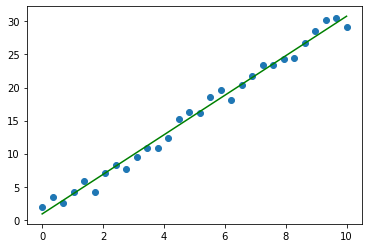

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# 转化成矩阵
X = np.linspace(0,10,num = 30).reshape(-1,1)
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 1)
b = np.random.randint(1,10,size = 1)
# 根据一元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = X * w + b + np.random.randn(30,1)
plt.scatter(X,y)
# 重新构造X，b截距，相当于系数w0，前面统一乘以1
X = np.concatenate([X,np.full(shape = (30,1),fill_value= 1)],axis = 1)
# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)
print('一元一次方程真实的斜率和截距是：',w, b)
print('通过正规方程求解的斜率和截距是：',θ)
# 根据求解的斜率和截距绘制线性回归线型图
plt.plot(X[:,0],X.dot(θ),color = 'green')

#### 多元线性回归

二元一次方程真实的斜率和截距是： [2 1 3]
通过正规方程求解的斜率和截距是： [2.   1.   2.95]


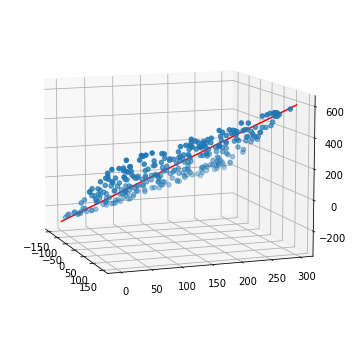

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D # 绘制三维图像
# 转化成矩阵
x1 = np.random.randint(-150,150,size = (300,1))
x2 = np.random.randint(0,300,size = (300,1))
# 斜率和截距，随机生成
w = np.random.randint(1,5,size = 2)
b = np.random.randint(1,10,size = 1)
# 根据二元一次方程计算目标值y，并加上“噪声”，数据有上下波动~
y = x1 * w[0] + x2 * w[1] + b + np.random.randn(300,1)
fig = plt.figure(figsize=(9,6))
# ax = Axes3D(fig)
ax = plt.subplot(111, projection='3d')
ax.scatter(x1,x2,y) # 三维散点图
ax.view_init(elev=10, azim=-20) # 调整视角
# 重新构造X，将x1、x2以及截距b，相当于系数w0，前面统一乘以1进行数据合并
X = np.concatenate([x1,x2,np.full(shape = (300,1),fill_value=1)],axis = 1)
w = np.concatenate([w,b])
# 正规方程求解
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y).round(2)
print('二元一次方程真实的斜率和截距是：',w)
print('通过正规方程求解的斜率和截距是：',θ.reshape(-1))
# # 根据求解的斜率和截距绘制线性回归线型图
x = np.linspace(-150,150,100)
y = np.linspace(0,300,100)
z = x * θ[0] + y * θ[1] + θ[2]
ax.plot(x,y,z ,color = 'red')